# Programming assignment 1: k-Nearest Neighbors classification

In [66]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction
For those of you new to Python, there are lots of tutorials online, just pick whichever you like best :)

If you never worked with Numpy or Jupyter before, you can check out these guides
* https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* http://jupyter.readthedocs.io/en/latest/

## Your task
In this notebook code to perform k-NN classification is provided. However, some functions are incomplete. Your task is to fill in the missing code and run the entire notebook. 

In the beginning of every function there is docstring, which specifies the format of input and output. Write your code in a way that adheres to it.
You may only use plain python and `numpy` functions (i.e. no scikit-learn classifiers).

Once you complete the assignments, export the entire notebook as PDF using [nbconvert](https://nbconvert.readthedocs.io/en/latest/) and attach it to your homework solutions. On a Linux machine you can simply use `pdfunite`, there are similar tools for other platforms too. You can only upload a single PDF file to Moodle.

## Load dataset
The iris data set (https://en.wikipedia.org/wiki/Iris_flower_data_set) is loaded and split into train and test parts by the function `load_dataset`.

In [67]:
def load_dataset(split):
    """Load and split the dataset into training and test parts.
    
    Parameters
    ----------
    split : float in range (0, 1)
        Fraction of the data used for training.
    
    Returns
    -------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    y_test : array, shape (N_test)
        Test labels.
    """
    dataset = datasets.load_iris()
    X, y = dataset['data'], dataset['target']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=123)
    return X_train, X_test, y_train, y_test

In [68]:
# prepare data
split = 0.67
X_train, X_test, y_train, y_test = load_dataset(split)

## Plot dataset
Since the data has 4 features, 16 scatterplots (4x4) are plotted showing the dependencies between each pair of features.

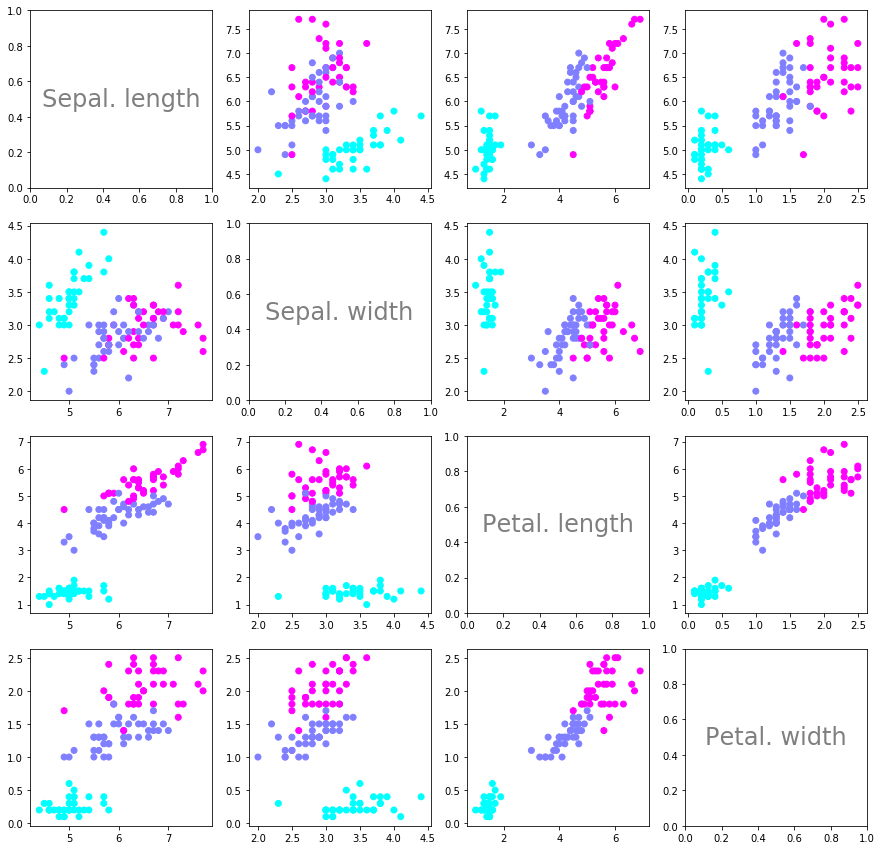

In [69]:
f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(X_train[:,j],X_train[:,i], c=y_train, cmap=plt.cm.cool)

## Task 1: Euclidean distance
Compute Euclidean distance between two data points.

In [70]:
def euclidean_distance(x1, x2):
    """Compute Euclidean distance between two data points.
    
    Parameters
    ----------
    x1 : array, shape (4)
        First data point.
    x2 : array, shape (4)
        Second data point.
    
    Returns
    -------
    distance : float
        Euclidean distance between x1 and x2.
    """
    # TODO
    distance = 0
    for index, elem in enumerate(x1):
        distance += np.square(x1[index]-x2[index])
    distance = np.sqrt(distance)
    return distance

## Task 2: get k nearest neighbors' labels
Get the labels of the *k* nearest neighbors of the datapoint *x_new*.

In [76]:
def get_neighbors_labels(X_train, y_train, x_new, k):
    """Get the labels of the k nearest neighbors of the datapoint x_new.
    
    Parameters
    ----------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    x_new : array, shape (4)
        Data point for which the neighbors have to be found.
    k : int
        Number of neighbors to return.
        
    Returns
    -------
    neighbors_labels : array, shape (k)
        Array containing the labels of the k nearest neighbors.
    """
    # TODO
   # neighbors_labels = np.empty(k,float)
   # neighbors_indeces = np.empty(k,int)
    dist = np.zeros(np.size(y_train))
    for i in range(np.size(y_train)):
        dist[i] = euclidean_distance(X_train[i,:],x_new)
    maxDist = np.amax(dist)+1.0
    neighbors_labels = []
    for i in range(k):
        minInd = np.argmin(dist)
        dist[minInd] = maxDist
        neighbors_labels.append(y_train[minInd])
    return neighbors_labels
        
    
    
    #for index, elem in enumerate(X_train):
       # if index < 4:
          #  neighbors_indeces[index] = index
       # else: 
          #  curDist = euclidean_distance(elem,x_new)
         #   maxDist = 0
         #   maxInd = 0
          #  for neighbors_indeces_elem in neighbors_indeces:
          #      dist = euclidean_distance(X_train[neighbors_indeces_elem],x_new)
          #      if dist > maxDist:
           #         maxDist = dist
          #          maxInd = neighbors_indeces_elem
          #  if maxDist > curDist:
          #      neighbors_indeces[maxInd] = index
    #
    #
   # for i,e in neighbors_indeces:
     #   neighbors_labels[i] = y_train[e]
    
    # iterate through all N_train training samples
    # calculate distance to x_new
    # if distance is smaller than max value of indices in neighbors_indeces
    # -> replace that index
    # after iteration, write AND return labels of indices
    #return neighbors_labels

## Task 3: get the majority label
For the previously computed labels of the *k* nearest neighbors, compute the actual response. I.e. give back the class of the majority of nearest neighbors. Think about how a tie is handled by your solution.

In [77]:
def get_response(neighbors, num_classes=3):
    """Predict label given the set of neighbors.
    
    Parameters
    ----------
    neighbors_labels : array, shape (k)
        Array containing the labels of the k nearest neighbors.
    num_classes : int
        Number of classes in the dataset.
    
    Returns
    -------
    y : int
        Majority class among the neighbors.
    """
    # TODO
    class_votes = np.zeros(num_classes)
    for elem in neighbors:
        class_votes[elem] += 1
    return np.argmax(class_votes)

## Task 4: compute accuracy
Compute the accuracy of the generated predictions.

In [81]:
def compute_accuracy(y_pred, y_test):
    """Compute accuracy of prediction.
    
    Parameters
    ----------
    y_pred : array, shape (N_test)
        Predicted labels.
    y_test : array, shape (N_test)
        True labels.
    """
    # TODO
    n_right = 0
    for ind, elem in enumerate(y_pred):
        if elem == y_test[ind]:
            n_right += 1
    print(y_pred)
    return n_right/np.size(y_pred)

In [82]:
# This function is given, nothing to do here.
def predict(X_train, y_train, X_test, k):
    """Generate predictions for all points in the test set.
    
    Parameters
    ----------
    X_train : array, shape (N_train, 4)
        Training features.        
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    k : int
        Number of neighbors to consider.
    
    Returns
    -------
    y_pred : array, shape (N_test)
        Predictions for the test data.
    """
    y_pred = []
    for x_new in X_test:
        neighbors = get_neighbors_labels(X_train, y_train, x_new, k)
        y_pred.append(get_response(neighbors))
    return y_pred

## Testing
Should output an accuracy of 0.9473684210526315.

In [83]:
# prepare data
split = 0.67
X_train, X_test, y_train, y_test = load_dataset(split)
print('Training set: {0} samples'.format(X_train.shape[0]))
print('Test set: {0} samples'.format(X_test.shape[0]))

# generate predictions
k = 3
y_pred = predict(X_train, y_train, X_test, k)
accuracy = compute_accuracy(y_pred, y_test)
print('Accuracy = {0}'.format(accuracy))

# add prediction 
#z_pred = predict()

Training set: 112 samples
Test set: 38 samples
[2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0]
Accuracy = 0.9473684210526315
